### The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 
### Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet van, Saab 9000 and an Opel Manta 400 cars.This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

### The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel= linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.(10 points)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, svm, metrics

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [68]:
data = pd.read_csv('vehicle.csv')

In [69]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [70]:
data.shape

(846, 19)

In [71]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

#### *It seems from the above that fields CIRCULARITY, DISTANCE_CIRCULARITY, RADIUS_RATIO, PR.AXIS_ASPECT_RATIO, SCATTER_RATIO, ELONGATEDNESS, PR.AXIS_RECTANGULARITY, SCALED_VARIANCE, SCALED_VARIANCE.1, SCALED_RADIUS_OF_GYRATION,SCALED_RADIUS_OF_GYRATION.1, SKEWNESS_ABOUT, SKEWNESS_ABOUT.1, SKEWNESS_ABOUT.2 all are having missing-values*

In [73]:
data.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


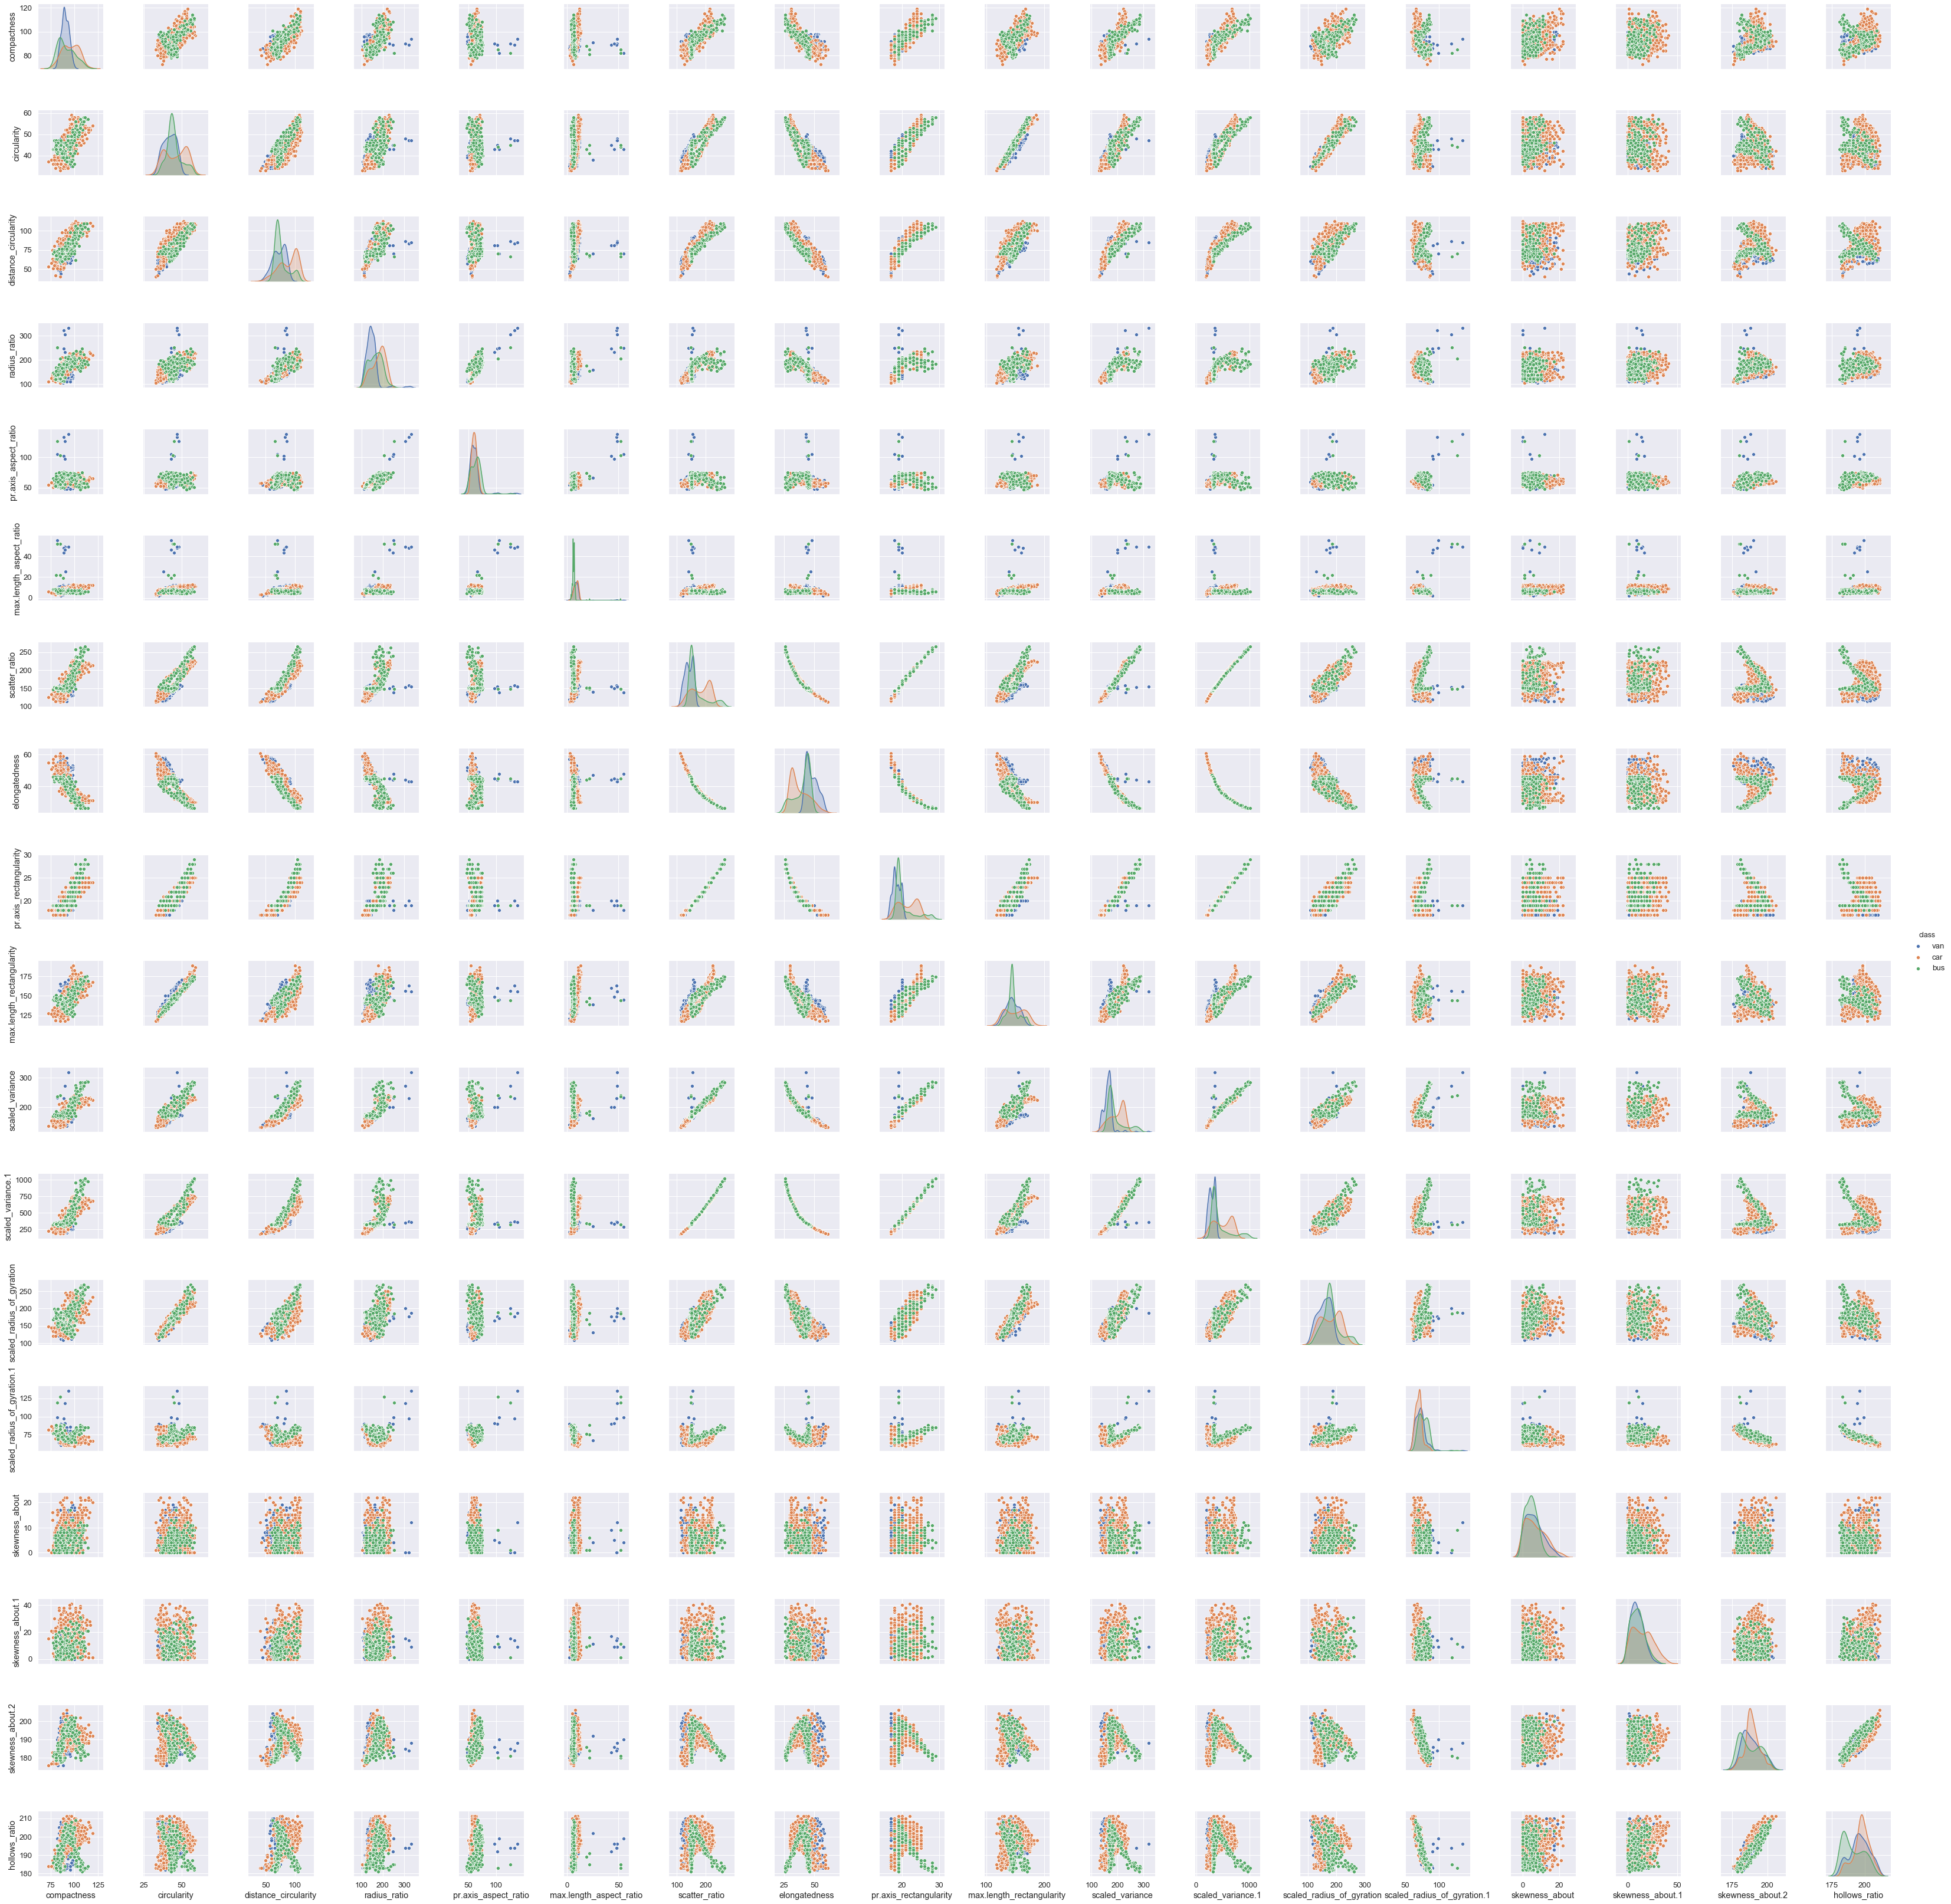

In [74]:
sns.pairplot(data,diag_kind='kde',hue='class')

#### *The below cells remove Null values with either mean/median, based on the data distribution seen in the above pairplot*

In [75]:
#Creating a back-up set before starting with the feature-engineering process
data_bkup = data.copy()

In [76]:
data['circularity'].fillna(data['circularity'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['distance_circularity'].fillna(data['distance_circularity'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['radius_ratio'].fillna(data['radius_ratio'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data is left-skewed, and there seems to be outliers on the
#right. Hence we impute missing values with median

In [77]:
data['pr.axis_aspect_ratio'].fillna(data['pr.axis_aspect_ratio'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data is left-skewed, and there seems to be outliers on the
#right. Hence we impute missing values with median

data['scatter_ratio'].fillna(data['scatter_ratio'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['elongatedness'].fillna(data['elongatedness'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

In [78]:
data['pr.axis_rectangularity'].fillna(data['pr.axis_rectangularity'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['scaled_variance'].fillna(data['scaled_variance'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['scaled_variance.1'].fillna(data['scaled_variance.1'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

In [79]:
data['scaled_radius_of_gyration'].fillna(data['scaled_radius_of_gyration'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['scaled_radius_of_gyration.1'].fillna(data['scaled_radius_of_gyration.1'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['skewness_about'].fillna(data['skewness_about'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data is left-skewed, and there seems to be outliers on the
#right. Hence we impute missing values with median

In [80]:
data['skewness_about.1'].fillna(data['skewness_about.1'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

data['skewness_about.2'].fillna(data['skewness_about.2'].median(),inplace=True)
#Replacing with median as from the above pair-plot it seems the data has 2 peaks, but a proper median

In [81]:
data.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

#### *Thus all missing values have been successfully treated.Now proceeding to handle OUTLIERS. It is to be remembered, that we are defining outliers as anything beyond Q1-I.5IQR/Q3+1.5IQR*

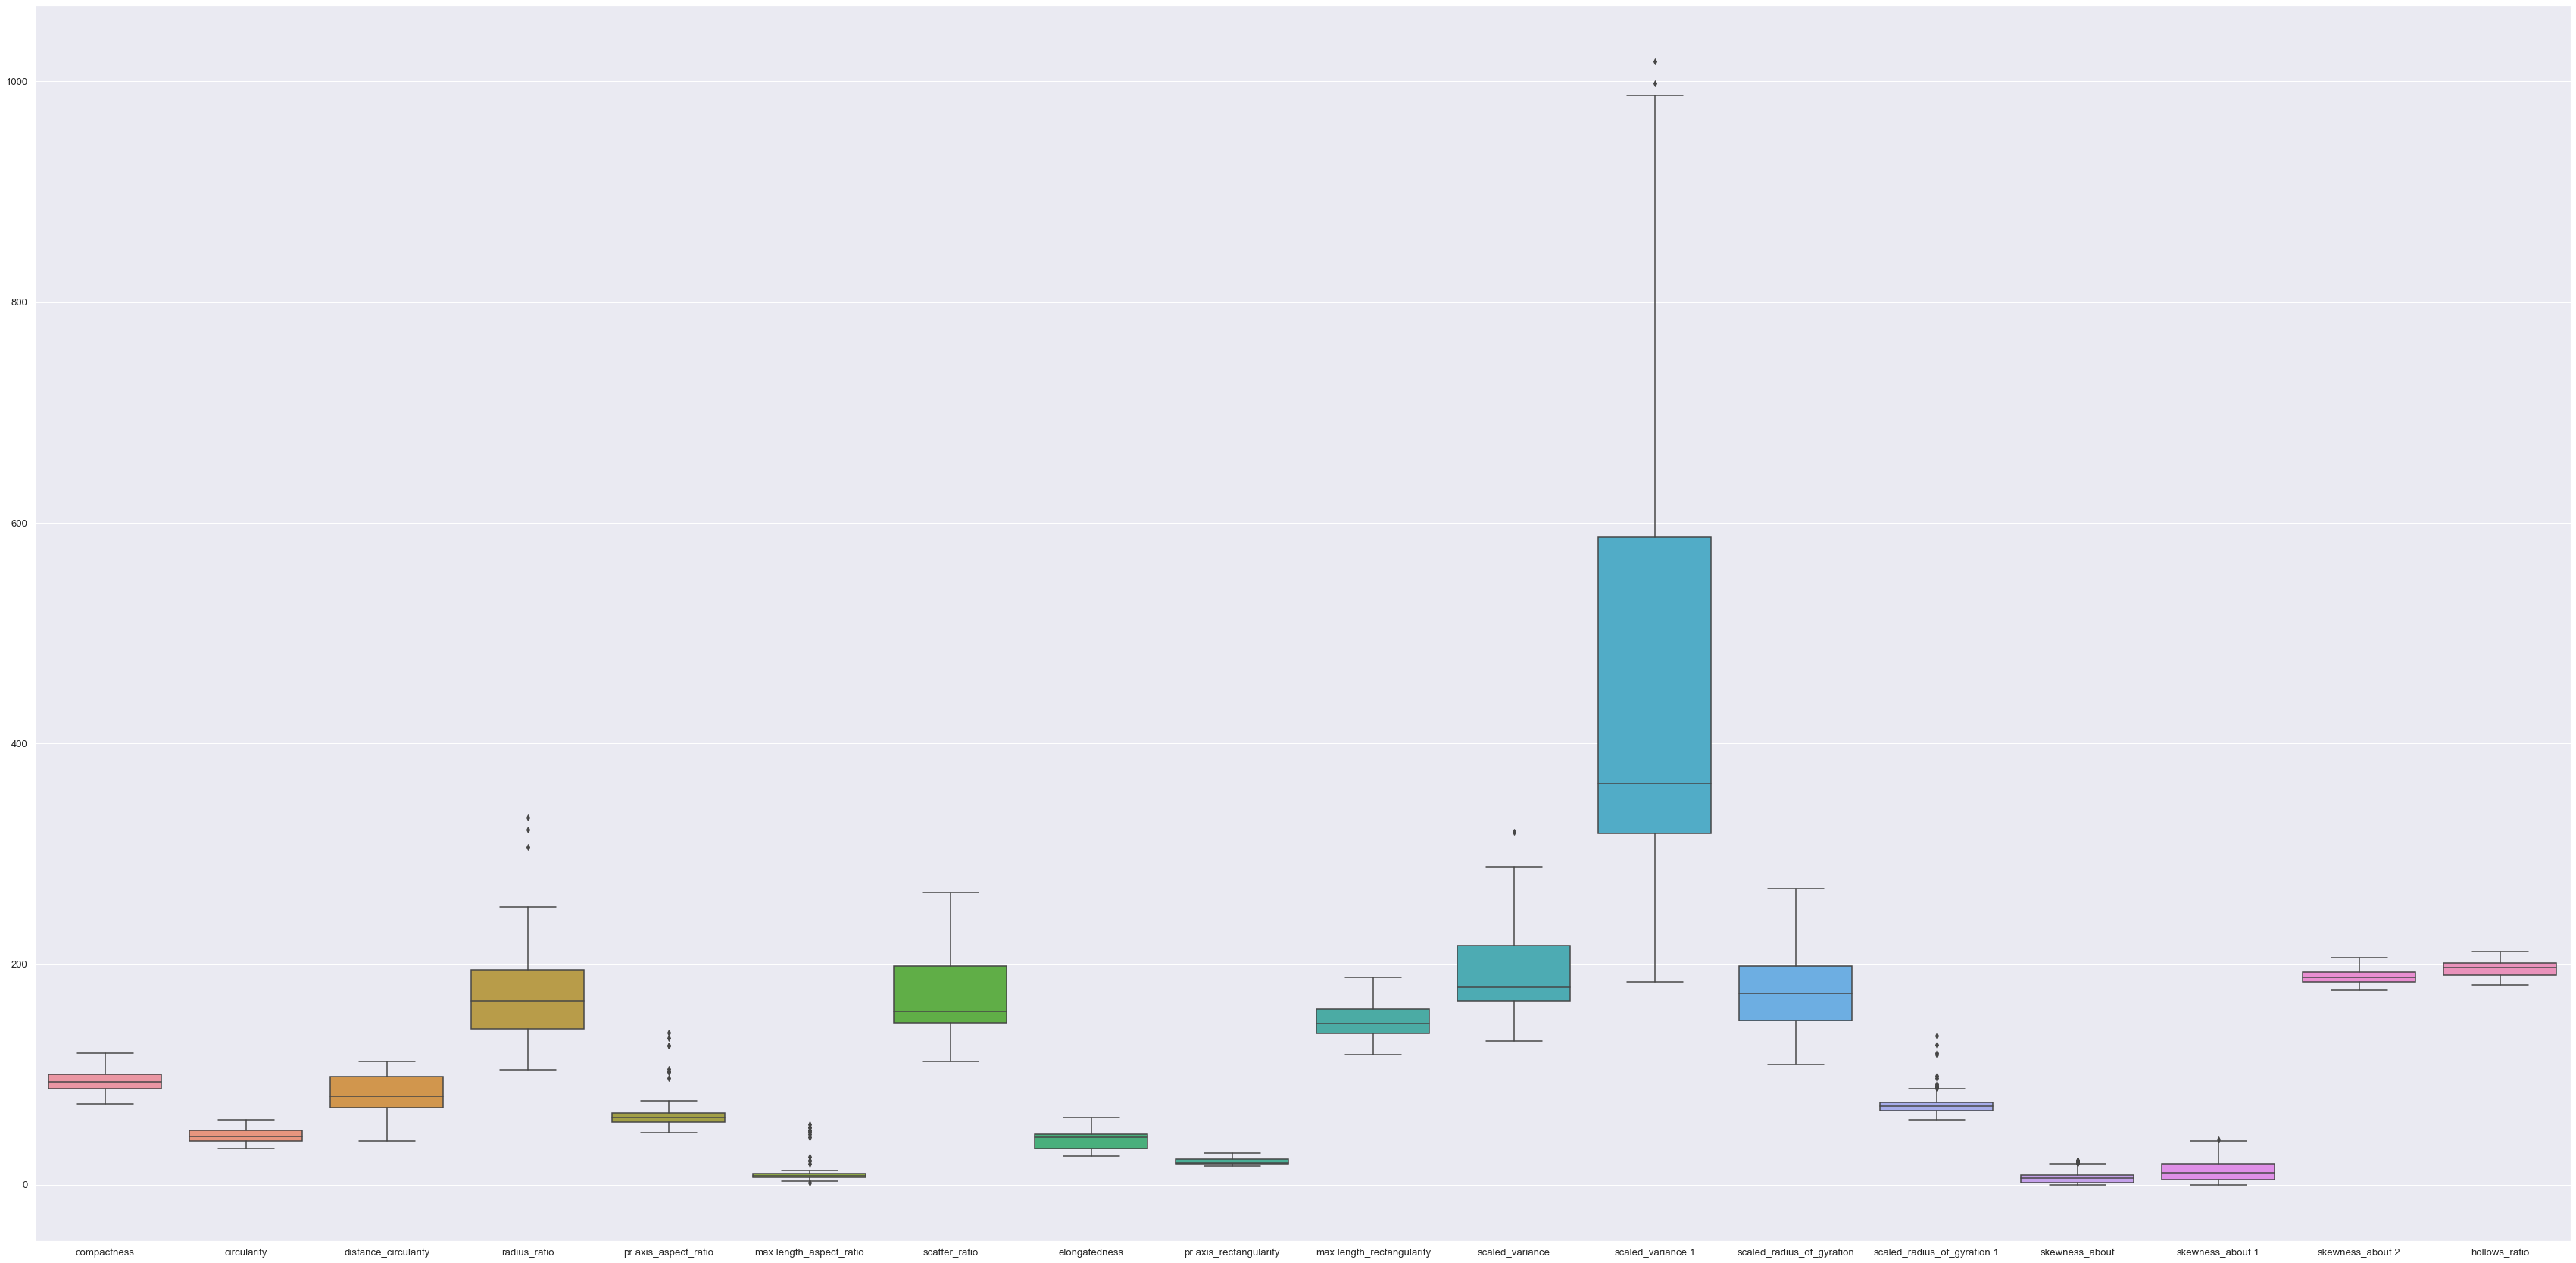

In [82]:
plt.figure(figsize=(60,30))
sns.boxplot(data=data)

In [83]:
#Custom function for removing outliers in each columns
#Outliers are defined as any values > Q3+1.5IQR or < Q1-1.5IQR
for i in list(data.columns):
    if i != 'class':
        q1 = data[i].quantile(q=0.25)
        q3 = data[i].quantile(q=0.75)
        iqr = q3 - q1
        max=q3+(1.5*iqr)
        min=q1-(1.5*iqr)
        data[i]=data[i].apply(lambda x: max if x>max else ( min if x<min else x))

In [84]:
plt.figure(figsize=(60,30))
sns.boxplot(data=data)

#### *Thus from the above we can see that there are no longer any outliers available. However, based on the data distribution, we will need to have SCALING done on the dataset*

### 2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [85]:
y=data['class']
data.drop('class',axis=1,inplace=True)

In [86]:
plt.figure(figsize = (50,50))
sns.set(font_scale = 1.2)
sns.heatmap(data=data.corr(), annot = True, square=True)

#### *From the above plot, we can decode that few of the features exhibit strong correlation between themselves. Ideally, to avoid the problem of multi-collinearity, we should drop these redundant features. Below we look at some of these highly-correlated features*

#### *Compactness*
1. Compactness vs scatter-ratio
2. Compactness vs elongatedness
3. Compactness vs max.length_rectangularity
4. Compactness vs scaled_variance
5. Compactness vs Distance_circularity
6. Compactness vs pr.axis_rectangularity

#### *Circularity*
1. Circularity vs distance_circularity
2. Circularity vs scatter_ratio
3. Circularity vs elongatedness
4. Circularity vs max.length_rectangularity
5. Circularity vs pr.axis_rectangularity
6. Circularity vs scaled_variance
7. Circularity vs scaled_variance.1
8. Circularity vs scaled_radius_of_gyration

#### *Distance_circularity*
1. Distance_circularity vs Compactness
2. Distance_circularity vs radius_ratio
3. Distance_circularity vs scatter_ratio
4. Distance_circularity vs elongatedness
5. Distance_circularity vs pr.axis_rectangularity
6. Distance_circularity vs scaled_variance
7. Distance_circularity vs scaled_variance.1

#### *radius_ratio*
1. radius_ratio vs elongatedness
2. radius_ratio vs scaled_variance

#### *scatter_ratio*
1. scatter_ratio vs elongatedness
2. scatter_ratio vs pr.axis_rectangularity
3. scatter_ratio vs max_length_rectangularity
4. scatter_ratio vs scaled_variance
5. scatter_ratio vs scaled_variance.1

#### *Elongatedness*
1. Elongatedness vs pr.axis_rectangularity
2. Elongatedness vs scaled_variance
3. Elongatedness vs scaled_variance.1

#### *pr.axis_rectangularity*
1. pr.axis_rectangularity vs max_length_rectangularity
2. pr.axis_rectangularity vs scaled_variance
3. pr.axis_rectangularity vs scaled_variance.1

In [87]:
plt.scatter(x=data['radius_ratio'],y=y)

In [88]:
plt.scatter(x=data['max.length_aspect_ratio'],y=y)

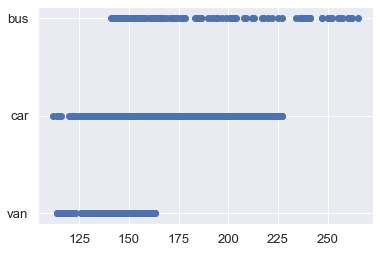

In [89]:
plt.scatter(x=data['scatter_ratio'],y=y)

In [90]:
plt.figure(figsize=(50,30))


plt.subplot(2, 9, 1)
plt.title('Class vs compactness')
plt.scatter(x=data['compactness'],y=y)

plt.subplot(2, 9, 2)
plt.title('Class vs circularity')
plt.scatter(x=data['circularity'],y=y)

plt.subplot(2, 9, 3)
plt.title('Class vs distance_circularity')
plt.scatter(x=data['distance_circularity'],y=y)

plt.subplot(1, 9, 4)
plt.title('Class vs radius_ratio')
plt.scatter(x=data['radius_ratio'],y=y)

plt.subplot(2, 9, 5)
plt.title('Class vs pr.axis_aspect_ratio')
plt.scatter(x=data['pr.axis_aspect_ratio'],y=y)

plt.subplot(1, 9, 6)
plt.title('Class vs max.length_aspect_ratio')
plt.scatter(x=data['max.length_aspect_ratio'],y=y)

plt.subplot(1, 9, 7)
plt.title('Class vs scatter_ratio')
plt.scatter(x=data['scatter_ratio'],y=y)

plt.subplot(2, 9, 8)
plt.title('Class vs elongatedness')
plt.scatter(x=data['elongatedness'],y=y)

plt.subplot(2, 9, 9)
plt.title('Class vs pr.axis_rectangularity')
plt.scatter(x=data['pr.axis_rectangularity'],y=y)

plt.subplot(2, 9, 10)
plt.title('Class vs max.length_rectangularity')
plt.scatter(x=data['max.length_rectangularity'],y=y)

plt.subplot(2, 9, 11)
plt.title('Class vs scaled_variance')
plt.scatter(x=data['scaled_variance'],y=y)

plt.subplot(2, 9, 12)
plt.title('Class vs scaled_variance.1')
plt.scatter(x=data['scaled_variance.1'],y=y)

plt.subplot(2, 9, 13)
plt.title('Class vs scaled_radius_of_gyration')
plt.scatter(x=data['scaled_radius_of_gyration'],y=y)

plt.subplot(2, 9, 14)
plt.title('Class vs scaled_radius_of_gyration.1')
plt.scatter(x=data['scaled_radius_of_gyration.1'],y=y)

plt.subplot(2, 9, 15)
plt.title('Class vs skewness_about')
plt.scatter(x=data['skewness_about'],y=y)

plt.subplot(2, 9, 16)
plt.title('Class vs skewness_about.1')
plt.scatter(x=data['skewness_about.1'],y=y)

plt.subplot(2, 9, 17)
plt.title('Class vs skewness_about.2')
plt.scatter(x=data['skewness_about.2'],y=y)

plt.subplot(2, 9, 18)
plt.title('Class vs hollows_ratio')
plt.scatter(x=data['hollows_ratio'],y=y)

#### *From the above bivariate analysis plots & heat-maps, between different independent features themselves & the same between independent features & the target variable, we can conclude the below*

1. A lot of features have high collinearity
2. However, none of the features have strong collinearity with the target classes.

#### *Thus we can't confidently drop any feature, based on it's collinearity with other features as we can't determine which feature has a stronger relationship with the target than others*

### 3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [91]:
columns=data.columns
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data),columns=columns)

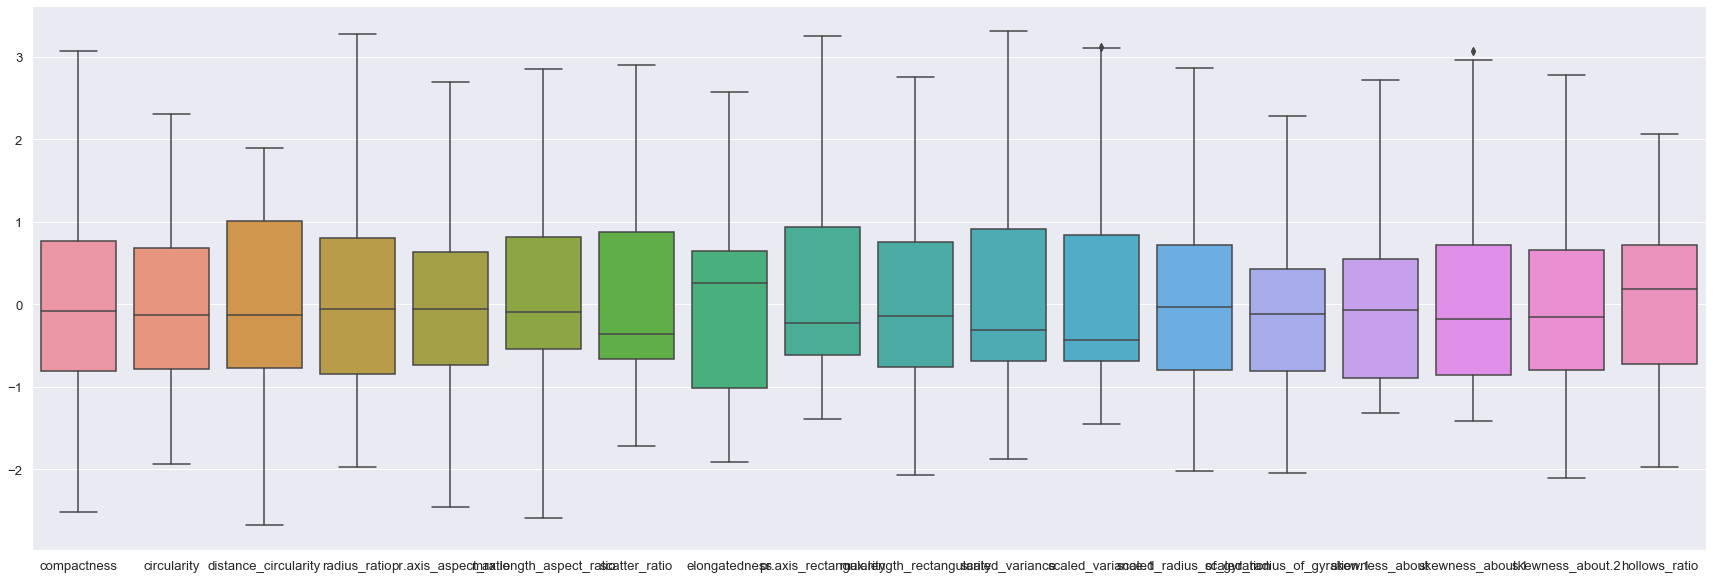

In [92]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data_scaled)

#### *As we can see from the above, scaling has drastically improved the data distribution, but has introduced new outliers due to the tightening of the IQRs*

In [93]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.70501074  0.16710246  0.437849
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76596737  0.81510445
   0.58593517 -0.26406291  0.23403775  0.15721202  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63155955  0.19810417  0.52459203
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80004452  0.83706327
   0.92691166  0.05654873  0.14472306 -0.01139577 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78177016  0.22876451  0.61188113
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86577617  0.88740232
   0.70660663 -0.24801881  0.11348655  0.26581165  0.14627113  0.33312625]
 [ 0.70501074  0.63155955  0.78177016  1.00118343  0.68167801  0.49825704
   0.75117576 -0.80682172  0.72497311  0.57712074  0.79545777  0.73569109
   0.54550889 -0.32844688  0.04925773  0.17752919  0.39225435  0.48132073]
 [ 0.16710246  0.19810417  0.22876451  0.68167801  1.00118343  0.23065416
   0.17340574 

In [94]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72551879e-01 -9.25238154e-02 -2.00271201e-01  1.17595212e-02
   1.65122292e-01  1.18547745e-01  2.98741245e-01  7.31405649e-01
  -3.38250981e-01 -2.42807194e-01 -3.82289246e-02  1.16062252e-01
   1.02094549e-01  8.44345116e-02  1.12975372e-02  7.26186259e-02
   1.15684606e-02 -3.37593913e-04]
 [-2.88538242e-01  1.29086711e-01 -1.10912415e-02 -2.05364249e-01
  -1.16259478e-01  5.28525574e-02 -3.99526964e-01  1.05751033e-01
  -4.61072988e-02  5.65339748e-02 -4.85975248e-02 -2.71750564e-01
   7.13844710e-02  2.52209254e-01  1.00942341e-02 -2.76995312e-01
   6.60118267e-01 -8.85908738e-02]
 [-3.02629461e-01 -5.14431857e-02 -6.83523545e-02  9.16318241e-02
  -1.05515576e-01  2.71808579e-02  9.51672320e-02 -3.38375477e-01
  -2.50606577e-01 -1.40992737e-01 -7.69783682e-01  1.56260787e-01
  -1.23551509e-01 -1.57253559e-01 -8.25178144e-03 -1.31236320e-01
   1.74631243e-02  4.10242038e-03]
 [-2.67794096e-01 -1.94720199e-01  2.82535767e-01 -2.96962770e-02
   1.05318684e-01 -

In [95]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.75980725  72.09081102  78.73191398  85.2204988   90.07531708
  94.19899369  96.11280864  97.33990735  98.08854955  98.62444487
  98.97384909  99.29604821  99.52625735  99.69934972  99.81861128
  99.92746403  99.98352508 100.        ]


In [96]:
plt.figure(figsize=(6 , 4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### *Thus from the above, we can say that the 1st 7 components are able to explain > 95% of the cumulative variance across the entire dataset. Thus we can reduce the entire dataset to 7 Principal Components*

In [97]:
pcadata_reduced = decomposition.PCA(n_components=7).fit_transform(data_scaled)

In [98]:
Proj_data_df = pd.DataFrame(pcadata_reduced)  # converting array to dataframe for pairplot
Proj_data_pca_df = Proj_data_df.join(y)
sns.pairplot(Proj_data_pca_df, diag_kind='kde') 

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel= linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.(10 points)

In [99]:
#Here the 6 principal components are our FEATURES & the 'class' variable is the TARGET
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y,test_size=0.3,random_state=100)

In [100]:
#Applying Grid-Search to find the max_depth & min_sample_leaf
model=svm.SVC(random_state=100)
n_folds=10
param_grid_svc = {'C':[0.01,0.05,0.5,1],'kernel': ['linear','rbf']}
grid_search = GridSearchCV(estimator=model,param_grid=param_grid_svc,cv=n_folds,verbose=1,n_jobs=10)

In [101]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done  61 out of  80 | elapsed:  2.2min remaining:   40.4s
[Parallel(n_jobs=10)]: Done  80 out of  80 | elapsed:  2.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=10,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [102]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.9155405405405406
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=100,
    shrinking=True, tol=0.001, verbose=False)
{'C': 1, 'kernel': 'rbf'}


In [103]:
svc_model = svm.SVC(C=1,kernel='rbf',random_state=100)
svc_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=100,
    shrinking=True, tol=0.001, verbose=False)

Accuracy for Support Vector Classifier using C=1 & kernel="RBF" during Testing is:  0.905511811023622
Confusion Matrix: 
 [[ 67   3   2]
 [  4 106   9]
 [  0   6  57]]


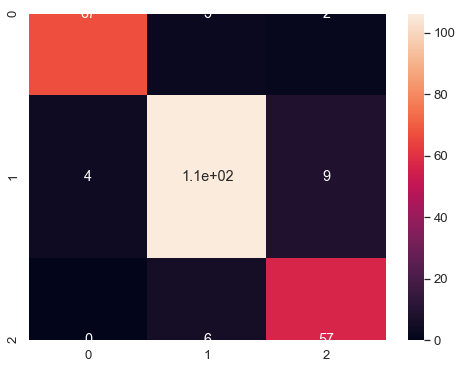

In [104]:
y_pred = svc_model.predict(X_test)
print ('Accuracy for Support Vector Classifier using C=1 & kernel="RBF" during Testing is: ',metrics.accuracy_score(y_test,y_pred))

#Printing the confusion matrix
print ("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True)

In [105]:
#Viewing the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.94      0.93      0.94        72
         car       0.92      0.89      0.91       119
         van       0.84      0.90      0.87        63

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.90       254
weighted avg       0.91      0.91      0.91       254



In [106]:
#Validate the Random Forest model build above using k fold
k_fold = KFold(n_splits=10, shuffle=True, random_state=100)
print ("Cross-Validation Score for each of the K folds: ",cross_val_score(svc_model, Proj_data_df, y, cv=k_fold, n_jobs=10))

Cross-Validation Score for each of the K folds:  [0.91764706 0.92941176 0.94117647 0.94117647 0.96470588 0.91764706
 0.91666667 0.91666667 0.94047619 0.95238095]
